In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import scipy.ndimage as ndimage
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import matplotlib.mlab as mlab
from matplotlib import cm
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.linewidth'] = 2

mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'

plt.rc('text', usetex=True) ## this line is necessary to use the correct fonts 
plt.rc('font', family='serif') # this line is necessary to use the correct font


# This function makes the plots pretty 
def plot_prop(f1,ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left') 
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['left'].set_position(('axes', -0.02))
    ax.spines['bottom'].set_position(('axes', -0.02))
    ax.xaxis.set_minor_locator(AutoMinorLocator(1))
    ax.yaxis.set_minor_locator(AutoMinorLocator(1))

    # x and y tickers
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
    plt.tick_params(direction='out',which='major', length=10,width=1.5,colors='k',labelsize=f1)
    plt.tick_params(direction='out',which='minor',length=5,width=1, color='k')
    
    return;

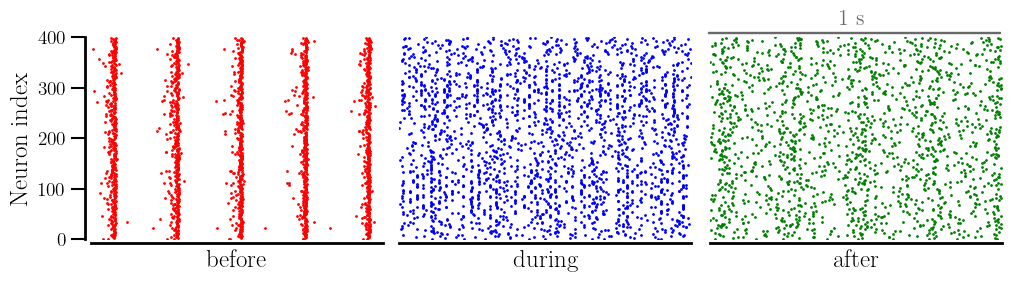

In [4]:
# Raster plot
spktimes = np.loadtxt("Data/Data_Fig20/spikeTimes_STDP(a=1.4,Wmean=0.8,k=8,beta=0.070,RR,Astim=0.40,Fs=50.0)raster.dat")

import matplotlib.font_manager as fm
l1=1; f1=14; f2=16; f3=18  # the font sizes 
fig = plt.figure(constrained_layout=True)
fig.set_size_inches(10,2.7)  # the size of the plot in inches 
gs = gridspec.GridSpec(1, 3, figure=fig,wspace=0.05)  # the gridspace, here I set 2 * 1
fontprops = fm.FontProperties(size=f2,weight='bold')

dt = 0.1 # ms
tmax = (0.1 + 2.0/60 + 0.1) * 3600e3 # simulation time in ms
nt = int(tmax/dt)
time = np.arange(0,nt)*dt*1e-3 # in s
N = 400

n_step = int(1/dt/1e-3) # number of steps in 1s
spont_init = int(0.1*3600e3/dt) - n_step
spont_end = int(0.1*3600e3/dt)
stim_init = int((0.1+1.0/60)*3600e3/dt) # starting 1 minute after stimulation began (total duration of stimulus = 2 min)
stim_end = stim_init + n_step
desync_init = stim_end + int(0.05*3600e3/dt)
desync_end = desync_init + n_step

spikes = np.zeros([N,nt]) 

for i in range(N):
    nspk = np.where(spktimes[i] > 0)[0][-1]
    spiketimes = (spktimes[i,:nspk]/dt).astype(int)
    spikes[i,spiketimes] = 1

ax = pl.subplot(gs[0])
plot_prop(f1,ax)
ax.spy(spikes[:,spont_init:spont_end],marker='.',aspect='auto',color='red',markersize=2,origin='lower')
ax.set_xticks([])
ax.set_yticks([0,100,200,300,400])
ax.set_ylabel('Neuron index',fontsize=f3)
ax.set_xlabel('before',fontsize=f3)

ax = pl.subplot(gs[1])
plot_prop(f1,ax)
ax.spy(spikes[:,stim_init:stim_end],marker='.',aspect='auto',color='blue',markersize=2,origin='lower')
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('during',fontsize=f3)

ax = pl.subplot(gs[2])
plot_prop(f1,ax)
ax.spy(spikes[:,desync_init:desync_end],marker='.',aspect='auto',color='green',markersize=2,origin='lower')
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('after',fontsize=f3)

scalebar = AnchoredSizeBar(ax.transData,n_step, '1 s', "lower left", pad=0.,color='dimgray',frameon=False,label_top=True,
                           size_vertical=2., fontproperties=fontprops, bbox_to_anchor=(-0.015, 1.01), bbox_transform=ax.transAxes)

ax.add_artist(scalebar)

# plt.savefig('Raster.jpg',dpi=600)
plt.show()